In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from script import bias_variance, print_metrics


In [18]:
data = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1)

x = data[:, :-1]
y = data[:, -1]

scaler_x = StandardScaler()

x_scaled = scaler_x.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.2)

degree = range(1,6)
folds = 5
lambda_values = lambda_values = [0.0001, 0.001, 0.01, 0.1, 1.0]  

mse_ols_train = np.zeros((len(degree), folds))
mse_ols_val = np.zeros((len(degree), folds))
bias_ols_train = np.zeros((len(degree), folds))
bias_ols_val = np.zeros((len(degree), folds))
variance_ols_train = np.zeros((len(degree), folds))
variance_ols_val = np.zeros((len(degree), folds))

mse_ridge_train = np.zeros((len(degree), len(lambda_values), folds))
mse_ridge_val = np.zeros((len(degree), len(lambda_values), folds))
bias_ridge_train = np.zeros((len(degree), len(lambda_values), folds))
bias_ridge_val = np.zeros((len(degree), len(lambda_values), folds))
variance_ridge_train = np.zeros((len(degree), len(lambda_values), folds))
variance_ridge_val = np.zeros((len(degree), len(lambda_values), folds))

mse_lasso_train = np.zeros((len(degree), len(lambda_values), folds))
mse_lasso_val = np.zeros((len(degree), len(lambda_values), folds))
bias_lasso_train = np.zeros((len(degree), len(lambda_values), folds))
bias_lasso_val = np.zeros((len(degree), len(lambda_values), folds))
variance_lasso_train = np.zeros((len(degree), len(lambda_values), folds))
variance_lasso_val = np.zeros((len(degree), len(lambda_values), folds))

kfold = KFold(n_splits = folds)
fold_num = 0
for train_inds, val_inds in kfold.split(X_train):

  x_train, x_val = X_train[train_inds], X_train[val_inds]
  y_train, y_val = Y_train[train_inds], Y_train[val_inds]

  for deg in degree:

    poly = PolynomialFeatures(degree=deg)
    x_train_poly = poly.fit_transform(x_train)
    x_val_poly = poly.transform(x_val)

    beta_OLS = np.linalg.inv(x_train_poly.T @ x_train_poly) @ x_train_poly.T @ y_train

    y_pred_OLS_train = x_train_poly @ beta_OLS
    y_pred_OLS_val = x_val_poly @ beta_OLS

    mse_ols_train[deg-1, fold_num] = mean_squared_error(y_train, y_pred_OLS_train)
    mse_ols_val[deg-1, fold_num] = mean_squared_error(y_val, y_pred_OLS_val)

    bias_train, variance_train = bias_variance(y_train, y_pred_OLS_train)
    bias_val, variance_val = bias_variance(y_val, y_pred_OLS_val)

    bias_ols_train[deg-1, fold_num] = bias_train
    bias_ols_val[deg-1, fold_num] = bias_val
    variance_ols_train[deg-1, fold_num] = variance_train
    variance_ols_val[deg-1, fold_num] = variance_val


    lmb_num = 0
    for lmb in lambda_values:

      beta_ridge = np.linalg.inv(x_train_poly.T @ x_train_poly + lmb*np.eye(x_train_poly.shape[1])) @ x_train_poly.T @ y_train
      y_pred_ridge_train = x_train_poly @ beta_ridge
      y_pred_ridge_val = x_val_poly @ beta_ridge

      mse_ridge_train[deg-1, lmb_num, fold_num] = mean_squared_error(y_train, y_pred_ridge_train)
      mse_ridge_val[deg-1, lmb_num, fold_num] = mean_squared_error(y_val, y_pred_ridge_val)

      bias_train, variance_train = bias_variance(y_train, y_pred_ridge_train)
      bias_val, variance_val = bias_variance(y_val, y_pred_ridge_val)

      bias_ridge_train[deg-1, lmb_num, fold_num] = bias_train
      bias_ridge_val[deg-1, lmb_num, fold_num] = bias_val
      variance_ridge_train[deg-1, lmb_num, fold_num] = variance_train
      variance_ridge_val[deg-1, lmb_num, fold_num] = variance_val

      lasso = linear_model.Lasso(lmb, fit_intercept=False)
      lasso.fit(x_train_poly, y_train)
      y_pred_lasso_train = lasso.predict(x_train_poly)
      y_pred_lasso_val = lasso.predict(x_val_poly)

      mse_lasso_train[deg-1, lmb_num, fold_num] = mean_squared_error(y_train, y_pred_lasso_train)
      mse_lasso_val[deg-1, lmb_num, fold_num] = mean_squared_error(y_val, y_pred_lasso_val)
      
      bias_train, variance_train = bias_variance(y_train, y_pred_lasso_train)
      bias_val, variance_val = bias_variance(y_val, y_pred_lasso_val)

      bias_lasso_train[deg-1, lmb_num, fold_num] = bias_train
      bias_lasso_val[deg-1, lmb_num, fold_num] = bias_val
      variance_lasso_train[deg-1, lmb_num, fold_num] = variance_train
      variance_lasso_val[deg-1, lmb_num, fold_num] = variance_val

      lmb_num += 1
  fold_num +=1


/home/ingar/Documents/prosa/fys4155/FYS-STK4155-Project1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.160e+00, tolerance: 3.311e+00
  model = cd_fast.enet_coordinate_descent(
/home/ingar/Documents/prosa/fys4155/FYS-STK4155-Project1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.215e+02, tolerance: 3.311e+00
  model = cd_fast.enet_coordinate_descent(
/home/ingar/Documents/prosa/fys4155/FYS-STK4155-Project1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might

In [19]:
#Calculate the average mse, error, bias and variance

avg_mse_ols_train = np.mean(mse_ols_train, axis=1)
avg_mse_ols_val = np.mean(mse_ols_val, axis=1)
avg_bias_ols_train = np.mean(bias_ols_train, axis=1)
avg_bias_ols_val = np.mean(bias_ols_val, axis=1)
avg_variance_ols_train = np.mean(variance_ols_train, axis=1)
avg_variance_ols_val = np.mean(variance_ols_val, axis=1)

avg_mse_ridge_train = np.mean(mse_ridge_train, axis=2)
avg_mse_ridge_val = np.mean(mse_ridge_val, axis=2)
avg_bias_ridge_train = np.mean(bias_ridge_train, axis=2)
avg_bias_ridge_val = np.mean(bias_ridge_val, axis=2)
avg_variance_ridge_train = np.mean(variance_ridge_train, axis=2)
avg_variance_ridge_val = np.mean(variance_ridge_val, axis=2)

avg_mse_lasso_train = np.mean(mse_lasso_train, axis=2)
avg_mse_lasso_val = np.mean(mse_lasso_val, axis=2)
avg_bias_lasso_train = np.mean(bias_lasso_train, axis=2)
avg_bias_lasso_val = np.mean(bias_lasso_val, axis=2)
avg_variance_lasso_train = np.mean(variance_lasso_train, axis=2)
avg_variance_lasso_val = np.mean(variance_lasso_val, axis=2)


In [20]:
print("================================================================================================ \n"
      + "Best polynomial and combination of polynomial and lambda for OLS, Ridge and Lasso regression.\n" 
      + "Based on the average MSE from all folds from cross-validation. \n"
      + "================================================================================================= ")

print('Train cases for OLS')
min_ols_index_train = np.argmin(avg_mse_ols_train)
best_ols_degree_train = degree[min_ols_index_train]
print('Degree ' + str(best_ols_degree_train) + ' gives MSE ' + str(avg_mse_ols_train[min_ols_index_train]) + ' for OLS on training data')

print('Val cases for OLS')
min_ols_index_val = np.argmin(avg_mse_ols_val)
best_ols_degree_val = degree[min_ols_index_val]
print('Degree ' + str(best_ols_degree_val) + ' gives MSE ' + str(avg_mse_ols_val[min_ols_index_val]) + ' for OLS on val data')

print('Train cases for Ridge')
min_ridge_index_train = np.unravel_index(np.argmin(avg_mse_ridge_train), avg_mse_ridge_train.shape)
best_ridge_degree_train = degree[min_ridge_index_train[0]]
best_ridge_lambda_train = lambda_values[min_ridge_index_train[1]]
print('Degree ' + str(best_ridge_degree_train) + ' and lambda ' + str(best_ridge_lambda_train) + ' gives MSE ' + str(avg_mse_ridge_train[min_ridge_index_train[0], min_ridge_index_train[1]]) + ' for Ridge on training data')

print('Val cases for Ridge')
min_ridge_index_val = np.unravel_index(np.argmin(avg_mse_ridge_val), avg_mse_ridge_val.shape)
best_ridge_degree_val = degree[min_ridge_index_val[0]]
best_ridge_lambda_val = lambda_values[min_ridge_index_val[1]]
print('Degree ' + str(best_ridge_degree_val) + ' and lambda ' + str(best_ridge_lambda_val) + ' gives MSE ' + str(avg_mse_ridge_val[min_ridge_index_val[0], min_ridge_index_val[1]]) + ' for Ridge on val data')

print('Train cases for Lasso')
min_lasso_index_train = np.unravel_index(np.argmin(avg_mse_lasso_train), avg_mse_lasso_train.shape)
best_lasso_degree_train = degree[min_lasso_index_train[0]]
best_lasso_lambda_train = lambda_values[min_lasso_index_train[1]]
print('Degree ' + str(best_lasso_degree_train) + ' and lambda ' + str(best_lasso_lambda_train) + ' gives MSE ' + str(avg_mse_lasso_train[min_lasso_index_train[0], min_lasso_index_train[1]]) + ' for Lasso on training data')

print('Val cases for Lasso')
min_lasso_index_val = np.unravel_index(np.argmin(avg_mse_lasso_val), avg_mse_lasso_val.shape)
best_lasso_degree_val = degree[min_lasso_index_val[0]]
best_lasso_lambda_val = lambda_values[min_lasso_index_val[1]]
print('Degree ' + str(best_lasso_degree_val) + ' and lambda ' + str(best_lasso_lambda_val) + ' gives MSE ' + str(avg_mse_lasso_val[min_lasso_index_val[0], min_lasso_index_val[1]]) + ' for Lasso on val data')

Best polynomial and combination of polynomial and lambda for OLS, Ridge and Lasso regression.
Based on the average MSE from all folds from cross-validation. 
Train cases for OLS
Degree 3 gives MSE 0.21195656286647635 for OLS on training data
Val cases for OLS
Degree 1 gives MSE 0.43351200422863556 for OLS on val data
Train cases for Ridge
Degree 4 and lambda 0.0001 gives MSE 3.971479271941633e-07 for Ridge on training data
Val cases for Ridge
Degree 1 and lambda 1.0 gives MSE 0.43347186321859804 for Ridge on val data
Train cases for Lasso
Degree 5 and lambda 0.0001 gives MSE 0.03774108465465319 for Lasso on training data
Val cases for Lasso
Degree 2 and lambda 0.01 gives MSE 0.42769165685639904 for Lasso on val data


In [25]:
print("Final results with test data")

poly = PolynomialFeatures(degree=best_ols_degree_val)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)
beta_ols = np.linalg.inv(x_train_poly.T @ x_train_poly) @ x_train_poly.T @ Y_train
y_pred_ols_test = x_test_poly @ beta_ols
mse_ols = mean_squared_error(Y_test, y_pred_ols_test)
print("MSE for OLS: " + str(mse_ols))

poly = PolynomialFeatures(degree=best_ridge_degree_val)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)
beta_ridge = np.linalg.inv(x_train_poly.T @ x_train_poly + best_ridge_lambda_val*np.eye(x_train_poly.shape[1])) @ x_train_poly.T @ Y_train
y_pred_ridge_test = x_test_poly @ beta_ridge
mse_ridge = mean_squared_error(Y_test , y_pred_ridge_test)
print('MSE for ridge: ' + str(mse_ridge))

poly = PolynomialFeatures(degree=best_lasso_degree_val)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)
lasso = linear_model.Lasso(best_lasso_lambda_val, fit_intercept=False)
lasso.fit(x_train_poly, Y_train)
y_pred_lasso_test = lasso.predict(x_test_poly)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso_test)
print('MSE for lasso: ' + str(mse_lasso))





Final results with test data
MSE for OLS: 0.38967995407291733
MSE for ridge: 0.3894050956701397
MSE for lasso: 0.3635953077216495


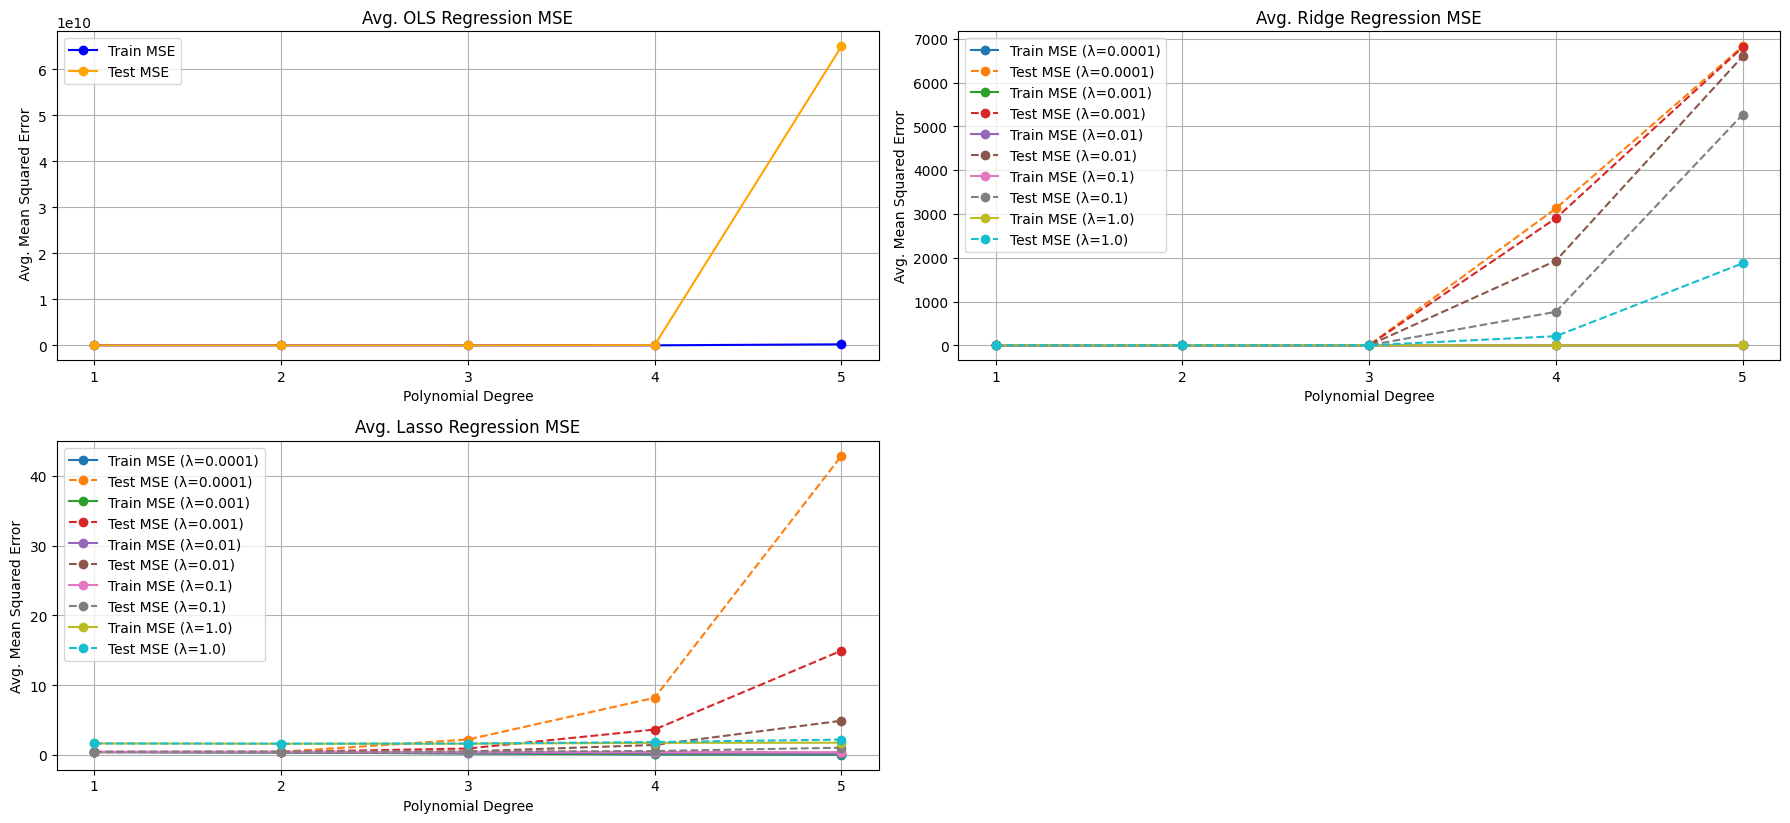

In [22]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1)
plt.plot(degree, avg_mse_ols_train, marker='o', label='Train MSE', color='blue')
plt.plot(degree, avg_mse_ols_val, marker='o', label='Test MSE', color='orange')
plt.title('Avg. OLS Regression MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel(' Avg. Mean Squared Error')
plt.xticks(degree)
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
for i, lmb in enumerate(lambda_values):
    plt.plot(degree, avg_mse_ridge_train[:, i], marker='o', label=f'Train MSE (λ={lmb})')
    plt.plot(degree, avg_mse_ridge_val[:, i], marker='o', linestyle='--', label=f'Test MSE (λ={lmb})')
plt.title('Avg. Ridge Regression MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Avg. Mean Squared Error')
plt.xticks(degree)
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
for i, lmb in enumerate(lambda_values):
    plt.plot(degree, avg_mse_lasso_train[:, i], marker='o', label=f'Train MSE (λ={lmb})')
    plt.plot(degree, avg_mse_lasso_val[:, i], marker='o', linestyle='--', label=f'Test MSE (λ={lmb})')
plt.title('Avg. Lasso Regression MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Avg. Mean Squared Error')
plt.xticks(degree)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [23]:
print_metrics("OLS", avg_mse_ols_train, avg_mse_ols_val, avg_bias_ols_train, avg_bias_ols_val, avg_variance_ols_train, avg_variance_ols_val, degree, None)

print_metrics("Ridge", avg_mse_ridge_train, avg_mse_ridge_val, avg_bias_ridge_train, avg_bias_ridge_val, avg_variance_ridge_train, avg_variance_ridge_val, degree, lambda_values)

print_metrics("Lasso", avg_mse_lasso_train, avg_mse_lasso_val, avg_bias_lasso_train, avg_bias_lasso_val, avg_variance_lasso_train, avg_variance_lasso_val, degree, lambda_values)


Metrics for OLS Model
Degree 1:
  Train MSE: 0.4248, Val MSE: 0.4335
  Train Bias: 0.6586, Val Bias: 0.6583
  Train Variance: 0.2338, Val Variance: 0.2328

Degree 2:
  Train MSE: 0.3676, Val MSE: 0.4672
  Train Bias: 0.6586, Val Bias: 0.6581
  Train Variance: 0.2911, Val Variance: 0.3179

Degree 3:
  Train MSE: 0.2120, Val MSE: 3.2609
  Train Bias: 0.6586, Val Bias: 0.6704
  Train Variance: 0.4467, Val Variance: 3.3447

Degree 4:
  Train MSE: 3921111.7766, Val MSE: 40986383.1460
  Train Bias: 51447.0604, Val Bias: 242371.0478
  Train Variance: 3869433.4283, Val Variance: 40744021.5180

Degree 5:
  Train MSE: 226393292.7023, Val MSE: 65001829778.7789
  Train Bias: 50651049.5661, Val Bias: 237372811.4937
  Train Variance: 175743332.5441, Val Variance: 64764443943.1220


Metrics for Ridge Model
Degree 1, Lambda 0.0001:
  Train MSE: 0.4248, Val MSE: 0.4335
  Train Bias: 0.6586, Val Bias: 0.6583
  Train Variance: 0.2338, Test Variance: 0.2328
Degree 1, Lambda 0.0010:
  Train MSE: 0.4248, V

Comments:
- scaling y resulted in worse MSE